In [638]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import re
import time
import datetime
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 10

In [639]:
#import the train and test dataset
train_df = pd.read_excel('Final_Train.xlsx')
train_df['Source'] = 'Train'
test_df = pd.read_excel('Final_Test.xlsx')
test_df['Source'] = 'Test'
df= pd.concat([train_df,test_df],axis=0)

In [640]:
#print 5 rows from train
train_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Source
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Train
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Train
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Train
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Train
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Train


In [641]:
#print 5 rows from test
test_df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Source
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN,Test
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN,Test
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai",Test
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN,Test
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...,Test


In [642]:
# no of rows and columns in train and test
train_df.shape,test_df.shape

((5961, 8), (1987, 7))

In [643]:
train_df.dtypes

Qualification         object
Experience            object
Rating                object
Place                 object
Profile               object
Miscellaneous_Info    object
Fees                   int64
Source                object
dtype: object

In [644]:
#Experience is a object , Convert ot number by removong the 'years string'
train_df['Experience'] = train_df['Experience'].str.split(' ').str[0]
test_df['Experience'] = test_df['Experience'].str.split(' ').str[0]
df['Experience'] = df['Experience'].str.split(' ').str[0]

In [645]:
train_df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
Source                   0
dtype: int64

In [646]:
test_df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
Source                   0
dtype: int64

In [647]:
#NAn values to No information
df['Miscellaneous_Info'].fillna('No information',inplace=True)

In [648]:
#converting experience to integer
df['Experience']=df['Experience'].astype(int)

In [649]:
df.dtypes

Experience              int32
Fees                  float64
Miscellaneous_Info     object
Place                  object
Profile                object
Qualification          object
Rating                 object
Source                 object
dtype: object

In [650]:
train_df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees,Source
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100,Train
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350,Train
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300,Train
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250,Train
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250,Train
...,...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300,Train
5957,MBBS,33,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100,Train
5958,MBBS,41,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600,Train
5959,"MBBS, MD - General Medicine",15,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100,Train


In [651]:
#Rating is a object , Convert ot number by removong the 'years string'
train_df['Rating'] = train_df['Rating'].str.split('%').str[0]
test_df['Rating'] = test_df['Rating'].str.split('%').str[0]
df['Rating'] = df['Rating'].str.split('%').str[0]

In [652]:
df['Rating'] = df['Rating'].astype(float)
train_df['Rating'] = train_df['Rating'].astype(float)
test_df['Rating'] = test_df['Rating'].astype(float)

In [653]:
df[df['Rating'].isnull()]

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,Source
2,9,300.0,No information,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,Train
3,12,250.0,"Bannerghatta Road, Bangalore ₹250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,Train
5,8,100.0,No information,"Porur, Chennai",Ayurveda,BAMS,NaN,Train
6,42,200.0,No information,"Karol Bagh, Delhi",Homeopath,BHMS,NaN,Train
8,14,100.0,No information,"Old City, Hyderabad",General Medicine,"MBBS, MD - General Medicine",NaN,Train
...,...,...,...,...,...,...,...,...
1981,8,NaN,No information,"Lajpat Nagar III, Delhi",Dermatologists,"MBBS, MD - Dermatology , Venereology & Leprosy...",NaN,Test
1982,10,NaN,No information,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN,Test
1983,4,NaN,No information,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN,Test
1984,9,NaN,No information,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN,Test


In [654]:
df['Rating'].fillna(0,inplace=True)
train_df['Rating'].fillna(0,inplace=True)
test_df['Rating'].fillna(0,inplace=True)

In [655]:
df.isnull().sum()

Experience               0
Fees                  1987
Miscellaneous_Info       0
Place                   31
Profile                  0
Qualification            0
Rating                   0
Source                   0
dtype: int64

In [656]:
place_null = df[df['Place'].isnull()].index

In [657]:
df.drop(index=place_null,axis=0,inplace=True)
df.isnull().sum()

Experience               0
Fees                  1973
Miscellaneous_Info       0
Place                    0
Profile                  0
Qualification            0
Rating                   0
Source                   0
dtype: int64

In [658]:
place_null = train_df[train_df['Place'].isnull()].index
train_df.drop(index=place_null,axis=0,inplace=True)
train_df.isnull().sum()
place_null = test_df[test_df['Place'].isnull()].index
test_df.drop(index=place_null,axis=0,inplace=True)
test_df.isnull().sum()

Qualification           0
Experience              0
Rating                  0
Place                   0
Profile                 0
Miscellaneous_Info    828
Source                  0
dtype: int64

In [659]:
df['Place'].value_counts()

HSR Layout, Bangalore            97
Andheri West, Mumbai             97
Dwarka, Delhi                    93
Banjara Hills, Hyderabad         84
Mulund West, Mumbai              81
                                 ..
Netaji Nagar, Delhi               1
Kovilpalayam, Coimbatore          1
West Of Chord Road, Bangalore     1
Tiruvottiyur, Chennai             1
Dindarpur, Delhi                  1
Name: Place, Length: 946, dtype: int64

In [660]:
#Now we will divide the Place column into multiple columns
#First we will find maximum Length 
max_address_length=-1
for i in range(len(df["Place"])):
    temp=len(df["Place"].iloc[i].strip().upper().split(","))
    if temp>max_address_length:
        max_address_length=temp
print("Max address length is :{}".format(max_address_length))

Max address length is :3


In [661]:
address_1=list()
address_2=list()
address_3=list()
for i in range(len(df["Place"])):
    temp=df["Place"].iloc[i].split(",")
    try :
        address_1.append(temp[0].strip().upper())
    except :
        address_1.append('NONE')
    try :
        address_2.append(temp[1].strip().upper())
    except :
        address_2.append('NONE')
    try :
        address_3.append(temp[2].strip().upper())
    except :
        address_3.append('NONE')

In [662]:
df['address_1'] = address_1
df['address_2'] = address_2
df['address_3'] = address_3

In [663]:
df.loc[df["address_3"]!="NONE"]
#we see only one row is there where p3 contains anything leaving "NONE"

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,Source,address_1,address_2,address_3
2169,11,250.0,No information,"Dwarka, Sector 5, Delhi",Dentist,BDS,0.0,Train,DWARKA,SECTOR 5,DELHI


In [664]:
#there is only one row for address 3 not null, so we can replace p2 with delhi abd drop it
df.loc[df["address_3"]!="NONE",['address_2']] = "DELHI"

In [665]:
df.drop(columns=['address_3'],inplace=True)

In [666]:
df.isnull().sum()

Experience               0
Fees                  1973
Miscellaneous_Info       0
Place                    0
Profile                  0
Qualification            0
Rating                   0
Source                   0
address_1                0
address_2                0
dtype: int64

In [667]:
df['Qualification'].to_list()

['BHMS, MD - Homeopathy',
 'BAMS, MD - Ayurveda Medicine',
 'MBBS, MS - Otorhinolaryngology',
 'BSc - Zoology, BAMS',
 'BAMS',
 'BAMS',
 'BHMS',
 'BDS',
 'MBBS, MD - General Medicine',
 'BSc, BDS',
 'MBBS, MS, DNB - ENT',
 'BAMS',
 'BDS, MDS',
 'BDS, MDS - Oral & Maxillofacial Surgery',
 'MBBS, Diploma in Otorhinolaryngology (DLO), DNB - ENT',
 'MBBS, MD - General Medicine',
 'MBBS, Diploma in Otorhinolaryngology (DLO)',
 'MBBS, MF- Homeopathy',
 'MBBS, MS - ENT',
 'MBBS',
 'MDS, DNB, BDS',
 'MBBS, DNB - ENT',
 'MBBS',
 'MBBS, Fellowship of College of General Practice (FCGP)',
 'MBBS, DDVL',
 'BDS',
 'MBBS, IBCLC (USA)',
 'MBBS, MD - General Medicine, Post Graduate Diploma in Diabetology (PGDD)',
 'BDS, MDS',
 'Diploma in Dermatology, MBBS',
 'MBBS, DDVL, Fellowship in Aesthetic Medicine',
 'BDS',
 'MBBS, MS - ENT',
 'DM - Neurology, MD - Pediatrics, MBBS',
 'BAMS',
 'BDS, MDS - Oral & Maxillofacial Surgery, Fellowship in Cleft Lip and Craniofacial Surgery',
 'BDS',
 'BHMS, Diploma in 

In [668]:
#Now we will divide the Qualification column into multiple columns
#First we will find maximum Length 
max_qual_length=-1
for i in range(len(df["Qualification"])):
    temp=len(df["Qualification"].iloc[i].strip().upper().split(","))
    if temp>max_qual_length:
        max_qual_length=temp
print("Max Qualification length is :{}".format(max_qual_length))

Max Qualification length is :17


In [669]:
Qualification_0=list()
Qualification_1=list()
Qualification_2=list()
Qualification_3=list()
Qualification_4=list()
Qualification_5=list()
Qualification_6=list()
Qualification_7=list()
Qualification_8=list()
Qualification_9=list()
Qualification_10=list()
Qualification_11=list()
Qualification_12=list()
Qualification_13=list()
Qualification_14=list()
Qualification_15=list()
Qualification_16=list()
Qualification_17=list()
for i in range(len(df["Qualification"])):
    temp=df["Qualification"].iloc[i].split(",")
    try :
        Qualification_0.append(temp[0].strip().upper())
    except :
        Qualification_0.append('NONE')
    try :
        Qualification_1.append(temp[1].strip().upper())
    except :
        Qualification_1.append('NONE')
    try :
        Qualification_2.append(temp[2].strip().upper())
    except :
        Qualification_2.append('NONE')
    try :
        Qualification_3.append(temp[3].strip().upper())
    except :
        Qualification_3.append('NONE')
    try :
        Qualification_4.append(temp[4].strip().upper())
    except :
        Qualification_4.append('NONE')
    try :
        Qualification_5.append(temp[5].strip().upper())
    except :
        Qualification_5.append('NONE')
    try :
        Qualification_6.append(temp[6].strip().upper())
    except :
        Qualification_6.append('NONE')
    try :
        Qualification_7.append(temp[7].strip().upper())
    except :
        Qualification_7.append('NONE')
    try :
        Qualification_8.append(temp[8].strip().upper())
    except :
        Qualification_8.append('NONE')
    try :
        Qualification_9.append(temp[9].strip().upper())
    except :
        Qualification_9.append('NONE')
    try :
        Qualification_10.append(temp[10].strip().upper())
    except :
        Qualification_10.append('NONE')
    try :
        Qualification_11.append(temp[11].strip().upper())
    except :
        Qualification_11.append('NONE')
    try :
        Qualification_12.append(temp[12].strip().upper())
    except :
        Qualification_12.append('NONE')
    try :
        Qualification_13.append(temp[13].strip().upper())
    except :
        Qualification_13.append('NONE')
    try :
        Qualification_14.append(temp[14].strip().upper())
    except :
        Qualification_14.append('NONE')
    try :
        Qualification_15.append(temp[15].strip().upper())
    except :
        Qualification_15.append('NONE')
    try :
        Qualification_16.append(temp[16].strip().upper())
    except :
        Qualification_16.append('NONE')

In [670]:
df["q1"]=Qualification_0
df["q2"]=Qualification_1
df["q3"]=Qualification_2
df["q4"]=Qualification_3
df["q5"]=Qualification_4
df["q6"]=Qualification_5
df["q7"]=Qualification_6
df["q8"]=Qualification_7
df["q9"]=Qualification_8
df["q10"]=Qualification_9
df["q11"]=Qualification_10
df["q12"]=Qualification_11
df["q13"]=Qualification_12
df["q14"]=Qualification_13
df["q15"]=Qualification_14
df["q16"]=Qualification_15
df["q17"]=Qualification_16

In [671]:
df.loc[(df["q7"]!="NONE")|(df["q8"]!="NONE")|(df["q9"]!="NONE")|(df["q10"]!="NONE")|(df["q11"]!="NONE")|(df["q12"]!="NONE")|(df["q13"]!="NONE")|(df["q14"]!="NONE")|(df["q15"]!="NONE")|(df["q16"]!="NONE")]
#There are only 15 rows with where either of q8 to 17 is not "NONE",so basically q8 to q17 we can simply drop

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,Source,address_1,address_2,...,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17
291,19,500.0,Dental Implant Fixing Implant Rehabilitation I...,"MG Road, Bangalore",Dentist,"BDS, MDS - Oral & Maxillofacial Surgery, Diplo...",94.0,Train,MG ROAD,BANGALORE,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
853,37,100.0,"100% 36 Feedback Fort, Mumbai","Fort, Mumbai",Homeopath,"MD - Homeopathy, BHMS, DHMS (Diploma in Homeop...",100.0,Train,FORT,MUMBAI,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
1419,17,800.0,Infectious Disease Treatment Vaccination/ Immu...,"Nungambakkam, Chennai",General Medicine,"MBBS, MD - General Medicine, DNB - General Med...",0.0,Train,NUNGAMBAKKAM,CHENNAI,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
1593,10,500.0,Dermabrasion Laser Resurfacing Acne / Pimples ...,"Ghatkopar East, Mumbai",Homeopath,"Diploma in Diet and Nutrition, BHMS, Diploma i...",99.0,Train,GHATKOPAR EAST,MUMBAI,...,FILLERS,THREADLIFTS,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
2035,22,300.0,RCT - Root Canal Treatment Cosmetic/ Aesthetic...,"Ashok Nagar, Chennai",Dentist,"Fellowship in Oral implantlogy, Certified Adva...",97.0,Train,ASHOK NAGAR,CHENNAI,...,FELLOWSHIP IN ADVANCED ENDOSCOPIC SINUS SURGERY,DEGREE IN DENTAL IMPLANT,FELLOWSHIP IN LASERS & COSMETOLOGY,NONE,NONE,NONE,NONE,NONE,NONE,NONE
2844,27,100.0,Cochlear Implants BAHA Surgery Functional Endo...,"Dadar East, Mumbai",ENT Specialist,"MBBS, MS - Otorhinolaryngology, Diploma in Oto...",98.0,Train,DADAR EAST,MUMBAI,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3562,5,700.0,No information,"Coimbatore Racecourse, Coimbatore",General Medicine,"MBBS, Diploma in Family Medicine (DFM), Certif...",0.0,Train,COIMBATORE RACECOURSE,COIMBATORE,...,CCMTD,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
3580,17,100.0,Non-Invasive Cardiology Chest Pain Treatment C...,"Greater Kailash Part 1, Delhi",General Medicine,"MBBS, MD - General Medicine, Post Graduate Dip...",88.0,Train,GREATER KAILASH PART 1,DELHI,...,POST GRADUATE CERTIFICATE IN SPORTS MEDICINE,CLINICAL CARDIOLOGY CERTIFICATION,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4174,29,100.0,"76% 8 Feedback Old Rajendra Nagar, Delhi","Old Rajendra Nagar, Delhi",General Medicine,"MBBS, DNB - General Medicine, FRCP, Post Gradu...",76.0,Train,OLD RAJENDRA NAGAR,DELHI,...,EULAR CERTIFICATE FOR RHEUMATIC DISEASES,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE
4655,14,400.0,No information,"Karol Bagh, Delhi",General Medicine,"MBBS, MD - Internal Medicine, Post Graduate Di...",0.0,Train,KAROL BAGH,DELHI,...,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE,NONE


In [672]:
df.drop(columns=['q7','q8','q9','q10','q11','q12','q13','q14','q15','q16'],inplace=True)

In [673]:
df.drop(columns=['Qualification'],inplace=True)
df.reset_index(inplace=True,drop=True)

In [674]:
from sklearn.feature_extraction.text import CountVectorizer
v=CountVectorizer()
Miscellaneous_Info = v.fit_transform(df['Miscellaneous_Info'].to_list())
print(Miscellaneous_Info.shape)

(7903, 1765)


In [675]:
misc_df = pd.DataFrame(Miscellaneous_Info.toarray()).reset_index(drop=True)

In [676]:
#df2.shape,misc_df.shape

In [677]:
df2 = df2.loc[~df2.index.duplicated(keep='first')]
misc_df = misc_df.loc[~misc_df.index.duplicated(keep='first')]

In [678]:
df2=df.copy()
#df2.reset_index()  
df_final=pd.concat([df,misc_df],axis=1)

In [679]:
df_final.shape,df2.shape

((7903, 1781), (7903, 16))

In [680]:
df_final.drop(columns='Miscellaneous_Info',inplace=True)

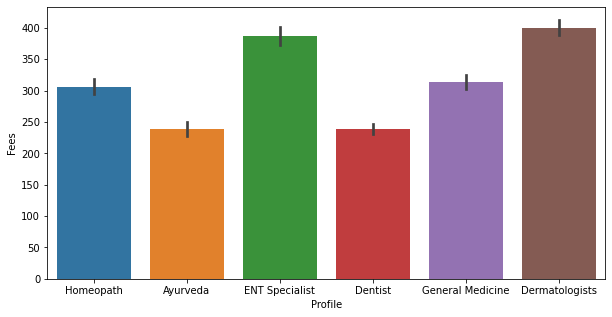

In [681]:

#Lets do some grpahical analysis
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.barplot(x="Profile",y="Fees",data=df_final)
plt.show()
#Here it is clear that ENT specialist and Dermatologists charge more

In [682]:
df_final.drop(columns='Place',inplace=True)

In [683]:
df_final

,Experience,Fees,Profile,Rating,Source,address_1,address_2,q1,q2,q3,...,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764
0,24,100.0,Homeopath,100.0,Train,KAKKANAD,ERNAKULAM,BHMS,MD - HOMEOPATHY,NONE,...,0,0,0,0,0,0,0,0,0,0
1,12,350.0,Ayurveda,98.0,Train,WHITEFIELD,BANGALORE,BAMS,MD - AYURVEDA MEDICINE,NONE,...,0,0,0,0,0,0,0,0,0,0
2,9,300.0,ENT Specialist,0.0,Train,MATHIKERE - BEL,BANGALORE,MBBS,MS - OTORHINOLARYNGOLOGY,NONE,...,0,0,0,0,0,0,0,0,0,0
3,12,250.0,Ayurveda,0.0,Train,BANNERGHATTA ROAD,BANGALORE,BSC - ZOOLOGY,BAMS,NONE,...,0,0,0,0,0,0,0,0,0,0
4,20,250.0,Ayurveda,100.0,Train,KEELKATTALAI,CHENNAI,BAMS,NONE,NONE,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7898,10,NaN,Ayurveda,0.0,Test,BASAVANAGUDI,BANGALORE,BAMS,DOCTOR OF MEDICINE,NONE,...,0,0,0,0,0,0,0,0,0,0
7899,4,NaN,Dermatologists,0.0,Test,CHOOLAI,CHENNAI,MD - DERMATOLOGY,VENEREOLOGY & LEPROSY,MBBS,...,0,0,0,0,0,0,0,0,0,0
7900,9,NaN,General Medicine,0.0,Test,PORUR,CHENNAI,MBBS,MD / MS - OBSTETRICS & GYNAECOLOGY,NONE,...,0,0,0,0,0,0,0,0,0,0
7901,12,NaN,Dentist,98.0,Test,AREKERE,BANGALORE,BDS,NONE,NONE,...,0,0,0,0,0,0,0,0,0,0


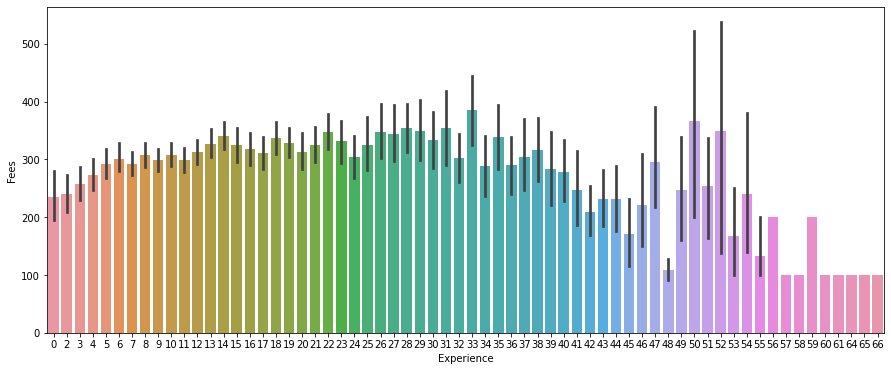

In [684]:
#Lets do some grpahical analysis
plt.figure(figsize=(15,6))
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="Experience",y="Fees",data=df_final)
plt.show()
#Here it is clear that ENT specialist and Dermatologists charge more

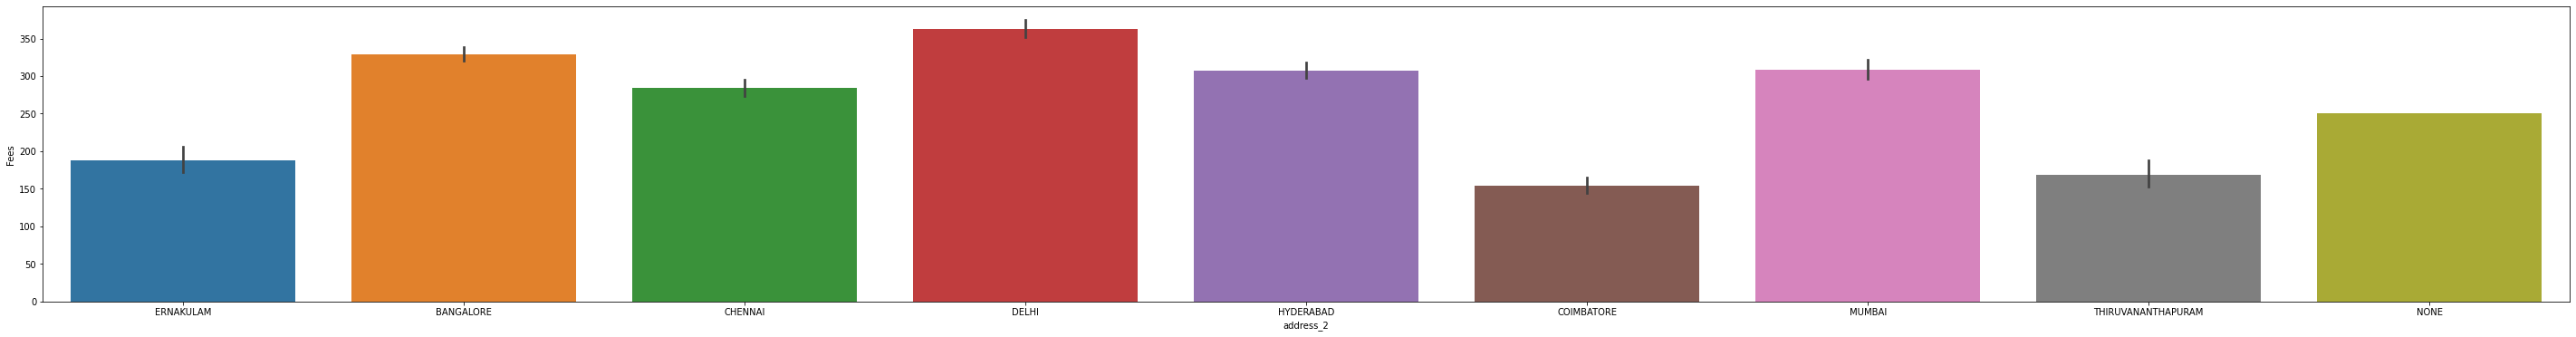

In [685]:
#Lets do some grpahical analysis
plt.figure(figsize=(50,6))
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="address_2",y="Fees",data=df_final)
plt.show()
#Here it is clear that ENT specialist and Dermatologists charge more

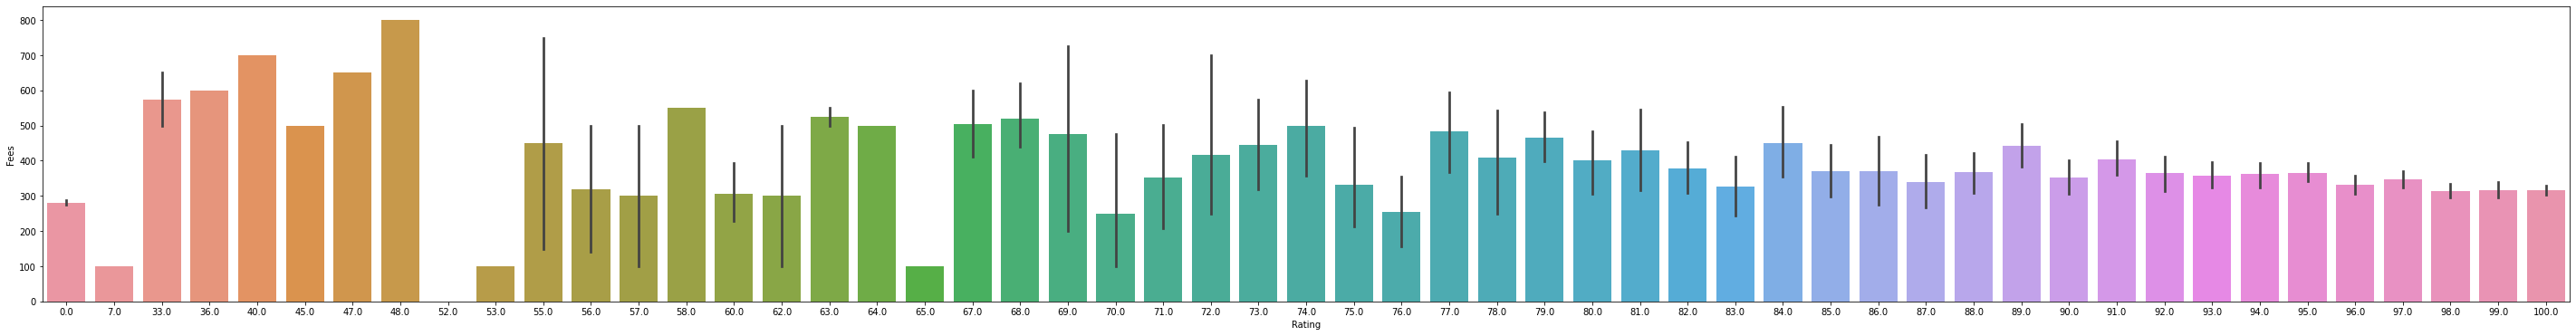

In [686]:
#Lets do some grpahical analysis
plt.figure(figsize=(50,6))
import seaborn as sns
import matplotlib.pyplot as plt
sns.barplot(x="Rating",y="Fees",data=df_final)
plt.show()
#Here it is clear that ENT specialist and Dermatologists charge more

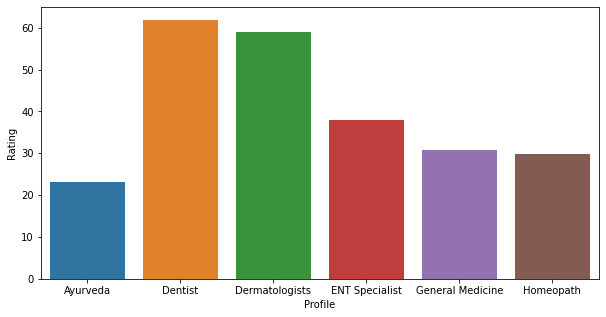

In [687]:
plt.figure(figsize=(10,5))
df_sub = df.groupby(['Profile']).agg({"Rating":"mean",
                             "Experience":"mean", #lambda x: x.value_counts().index[0],
                             "Fees":"mean"}).reset_index()
sns.barplot(x='Profile',y='Rating',data=df_sub)

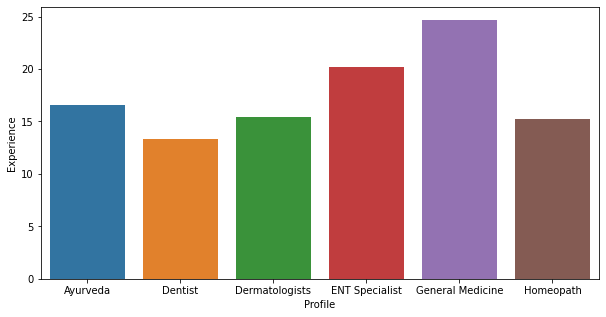

In [688]:
plt.figure(figsize=(10,5))
sns.barplot(x='Profile',y='Experience',data=df_sub)

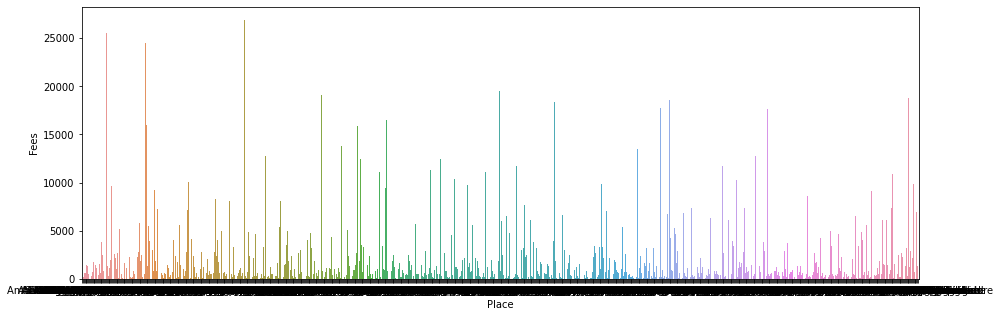

In [689]:
plt.figure(figsize=(15,5))
df_sub_place = df.groupby(by='Place').agg({"Fees":"sum","Rating":"mean"}).reset_index()
sns.barplot(x='Place',y='Fees',data=df_sub_place)

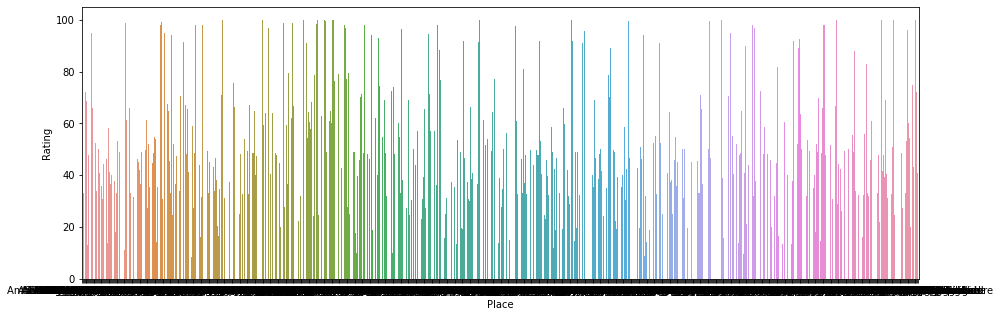

In [690]:
plt.figure(figsize=(15,5))
sns.barplot(x='Place',y='Rating',data=df_sub_place)

In [692]:
df3=df_final.copy()
from sklearn.preprocessing import LabelEncoder
for col in df_final.columns:
    if df_final[col].dtype=="object":
        df_final[col]=LabelEncoder().fit_transform(df_final[col])

In [696]:
df_final[df_final.Source == 1]

,Experience,Fees,Profile,Rating,Source,address_1,address_2,q1,q2,q3,...,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764
0,24,100.0,5,100.0,1,319,4,8,302,406,...,0,0,0,0,0,0,0,0,0,0
1,12,350.0,0,98.0,1,924,0,5,292,406,...,0,0,0,0,0,0,0,0,0,0
2,9,300.0,3,0.0,1,490,0,101,396,406,...,0,0,0,0,0,0,0,0,0,0
3,12,250.0,0,0.0,1,69,0,14,10,406,...,0,0,0,0,0,0,0,0,0,0
4,20,250.0,0,100.0,1,362,1,5,411,406,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5925,19,300.0,3,98.0,1,71,0,101,390,406,...,0,0,0,0,0,0,0,0,0,0
5926,33,100.0,4,0.0,1,582,1,101,411,406,...,0,0,0,0,0,0,0,0,0,0
5927,41,600.0,4,97.0,1,231,3,101,411,406,...,0,0,0,0,0,0,0,0,0,0
5928,15,100.0,4,90.0,1,906,6,101,299,406,...,0,0,0,0,0,0,0,0,0,0


In [697]:
df_finalDS = df_final[df_final.Source == 1]
X=df_finalDS.drop(columns=['Fees','Source'])
y=df_finalDS.Fees

In [705]:
#Lets bring every column to common scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(X)
x=pd.DataFrame(X,columns=X.columns)

In [706]:
from sklearn.model_selection import train_test_split,cross_val_score
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [707]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_squared_log_error,r2_score
def getscore_metrics(prediction,actual):
    print("mean_squared_error:",mean_squared_error(prediction,actual))
    print("mean_absolute_error:",mean_absolute_error(prediction,actual))
    #print("mean_squared_log_error:",mean_squared_log_error(prediction,actual))
    print("r2_score:",r2_score(prediction,actual))

In [708]:
def parsemodel(model,X,y,X_test,y_test):
    model.fit(X,y)
    pred = model.predict(X_test)
    model.score(X_test,y_test)
    getscore_metrics(pred,y_test)

In [702]:
from sklearn.neighbors import KNeighborsRegressor
print("cross_val_score:",cross_val_score(KNeighborsRegressor(),X_train,y_train,cv=5).mean())#(LogisticRegression,X,y
parsemodel(KNeighborsRegressor(),X_train,y_train,X_test,y_test)

cross_val_score: -0.0006784297829226738
mean_squared_error: 38625.657250894226
mean_absolute_error: 154.0035769034236
r2_score: -2.197082063079412


In [703]:
from sklearn.tree import DecisionTreeRegressor
print("cross_val_score:",cross_val_score(Dec
                                         isionTreeRegressor(),X_train,y_train,cv=5).mean())#(LogisticRegression,X,y
parsemodel(DecisionTreeRegressor(),X_train,y_train,X_test,y_test)

cross_val_score: -0.4390813191292695
mean_squared_error: 52859.95196729688
mean_absolute_error: 164.04905467552376
r2_score: -0.4516683900247538


In [714]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
lg = lgb.LGBMRegressor(silent=False)
param_dist = {"max_depth": [25,50, 75],
              "learning_rate" : [0.01,0.05,0.1],
              "num_leaves": [300,900,1200],
              "n_estimators": [200]
             }
grid_search = GridSearchCV(lg, n_jobs=-1, param_grid=param_dist, cv = 5, scoring="r2")
grid_search.fit(X_train,y_train)
grid_search.best_params_

{'learning_rate': 0.01,
 'max_depth': 25,
 'n_estimators': 200,
 'num_leaves': 300}

In [729]:
X_train

,Experience,Profile,Rating,address_1,address_2,q1,q2,q3,q4,q5,...,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764
1164,17,5,0.0,858,0,8,411,406,225,104,...,0,0,0,0,0,0,0,0,0,0
3728,40,3,0.0,311,6,101,116,406,225,104,...,0,0,0,0,0,0,0,0,0,0
476,36,2,95.0,491,6,101,326,76,225,104,...,0,0,0,0,0,0,0,0,0,0
3065,18,0,0.0,93,6,5,411,406,225,104,...,0,0,0,0,0,0,0,0,0,0
4573,20,1,0.0,816,1,6,352,406,225,104,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,19,4,0.0,654,1,101,464,347,225,104,...,0,0,0,0,0,0,0,0,0,0
5191,22,1,99.0,66,6,6,352,425,208,95,...,0,0,0,0,0,0,0,0,0,1
5226,12,2,96.0,302,0,101,296,156,225,104,...,0,0,0,0,0,0,0,0,0,0
5390,11,2,97.0,6,1,120,492,316,225,104,...,0,0,0,0,0,0,0,0,0,0


In [731]:
params={'learning_rate': 0.01,'max_depth': 25,'n_estimators': 200,'num_leaves': 300}
cate_features_name=['Profile', 'Rating', 'address_1', 'address_2', 'q2', 'q3','q4', 'q5', 'q6']
d_train = lgb.Dataset(X_train, label=y_train)
lgb_model = lgb.train(params, d_train, categorical_feature = cate_features_name)
y_pred = lgb_model.predict(X_test)

In [732]:
rmsle_scr=np.sqrt(mean_squared_log_error(y_test,y_pred))
print("RMSLE correspondingis ",rmsle_scr)
print("r2 score is ",r2_score(y_test,y_pred))

RMSLE correspondingis  0.6188926614692409
r2 score is  0.22685830898157022


In [738]:
df_test=df_final.loc[df_final["Source"]==0]

In [739]:
df_test.reset_index(drop=True,inplace=True)
df_test.drop(columns=["Source",'Fees'],inplace=True)
df_test

,Experience,Profile,Rating,address_1,address_2,q1,q2,q3,q4,q5,...,1755,1756,1757,1758,1759,1760,1761,1762,1763,1764
0,35,4,0.0,215,6,101,411,406,225,104,...,0,0,0,0,0,0,0,0,0,0
1,31,3,0.0,922,5,101,116,406,225,104,...,0,0,0,0,0,0,0,0,0,0
2,40,2,70.0,382,1,101,66,406,225,104,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0.0,572,3,5,411,406,225,104,...,0,0,0,0,0,0,0,0,0,0
4,16,1,100.0,335,0,6,337,406,225,104,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968,10,0,0.0,71,0,5,172,406,225,104,...,0,0,0,0,0,0,0,0,0,0
1969,4,2,0.0,131,1,110,493,316,225,104,...,0,0,0,0,0,0,0,0,0,0
1970,9,4,0.0,657,1,101,332,406,225,104,...,0,0,0,0,0,0,0,0,0,0
1971,12,1,98.0,33,0,6,411,406,225,104,...,0,0,0,0,0,0,0,0,0,0


In [740]:
doc_fee_pred=lgb_model.predict(df_test)

In [750]:
doc_fee_pred=pd.DataFrame(doc_fee_pred)

In [751]:
doc_fee_pred.to_csv("doctor_fees_predictions.csv",index=False)